# Problem Statement:

**To construct and train a neural network to accurately classify handwritten digits from the MNIST dataset. The goal is to navigate through the preprocessing of image data, select an appropriate neural network architecture, and apply optimization techniques to achieve high classification accuracy.**

# Introduction:

**The MNIST dataset is a large database of handwritten digits commonly used for training various image processing systems. The dataset contains 60,000 training images and 10,000 testing images, each of which is a 28x28 pixel grayscale image. The goal is to build a neural network model that can accurately classify these images into one of the ten digit classes(0 through 9)**

# Objectives:

- **Data Preprocessing: Prepare the MNIST dataset for training and testing the neural network model. This includes normalization of image pixel values and converting the output labels to a one-hot encoded format.**

- **Training: Train the neural network model using the preprocessed training data. Utilize categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and track accuracy as a performance metric.**

- **Evaluation: Evaluate the performance of the trained model using the testing dataset, ensuring that the model generalizes well to unseen data.**

- **Prediction: Implement functionality to make predictions on single images or batches of images, returning the digit class with the highest probability.**

- **Analysis: Analyze the results, understand the model's performance, and explore ways to improve it if necessary**

## Importing the dataset

In [23]:
from tensorflow.keras.datasets.mnist import load_data

In [24]:
(X_train, y_train), (X_test, y_test) = load_data()

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
# Let us visualize this handwritten digits to get a perspective

In [5]:
import matplotlib.pyplot as plt

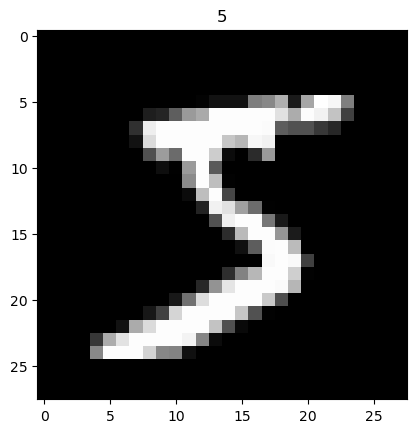

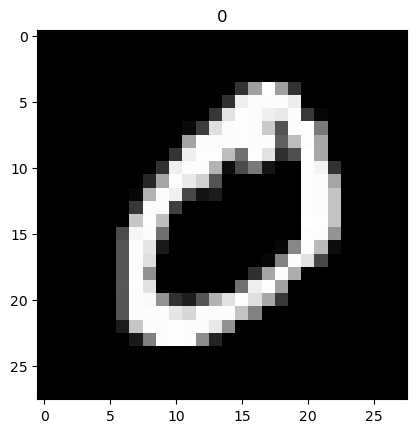

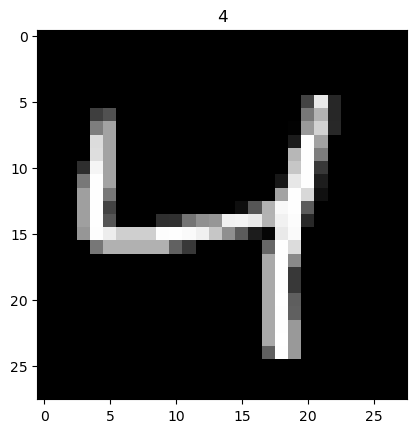

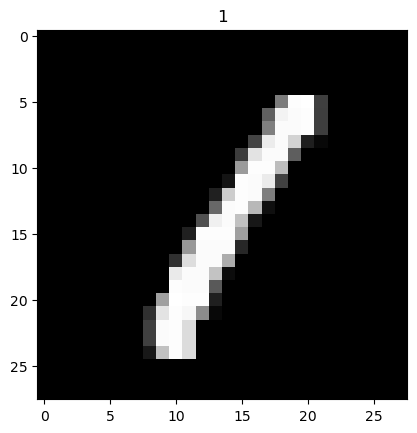

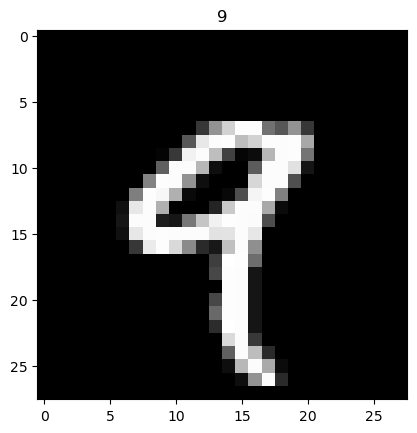

In [26]:
for i in range(5):
    plt.imshow(X_train[i], cmap="grey")
    plt.title(y_train[i])
    plt.show()

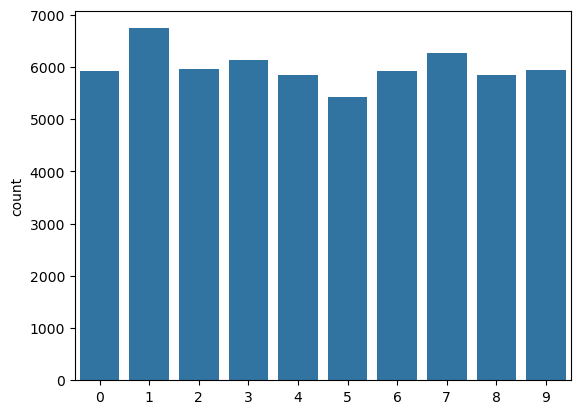

In [31]:
# Checking class distribution in the training dataset
import seaborn as sns
sns.countplot(x=y_train)
plt.show()

In [32]:
# The classes are more or less equally distributed

## Data Pre-processing

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
# Our input is a 2*2 array
# So we have to flatten the array to make it uni-dimensional

In [33]:
import numpy as np
X_train = X_train.reshape(-1, 784) # our array is a 2d array with (28*28). Converting into 1D array so it will give us (28*28=784) columns
X_test = X_test.reshape(-1, 784)

In [34]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [35]:
# One hot encoding of target labels

from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test) 

In [36]:
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 10)
(10000, 10)


In [37]:
print(y_train_ohe[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [38]:
# Normalizing the pixel values

# Our pixel values are in the range of [0, 255]

# So, simply dividing X_train and X_test by 255 will give us the normalized values

# MinMaxScalar scales the values in the range of [0,1] inclusive
# For normalizing we use the formula (x-xmin)/(xmax-xmin)
# Since, Xmin=0, we can divide by 255 to get the normalized values

X_train = X_train/255
X_test = X_test/255

In [39]:
print(X_train.min())
print(X_train.max())
print(X_test.min())
print(X_test.max())

0.0
1.0
0.0
1.0


## Model development & Training

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import L1L2

In [42]:
# Model architecture
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=20, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=10, activation="softmax"))

# Model Compilation
model.compile(optimizer = SGD(), loss="categorical_crossentropy", metrics=["accuracy"])

# Training the model
model.fit(x=X_train, y=y_train_ohe, epochs=200, validation_data=(X_test, y_test_ohe), batch_size=1000)
          

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.3185 - loss: 2.0601 - val_accuracy: 0.6429 - val_loss: 1.6301
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7209 - loss: 1.0401 - val_accuracy: 0.7705 - val_loss: 1.2343
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7943 - loss: 0.8426 - val_accuracy: 0.8332 - val_loss: 0.9517
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8240 - loss: 0.7417 - val_accuracy: 0.8558 - val_loss: 0.7653
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8469 - loss: 0.6620 - val_accuracy: 0.8697 - val_loss: 0.6478
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8605 - loss: 0.6063 - val_accuracy: 0.8766 - val_loss: 0.5720
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8652 - loss: 0.5730 - val_accuracy: 0.8816 - val_loss: 0.5230
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8740 - loss: 0.5319 - val_accuracy: 0.8862 - 

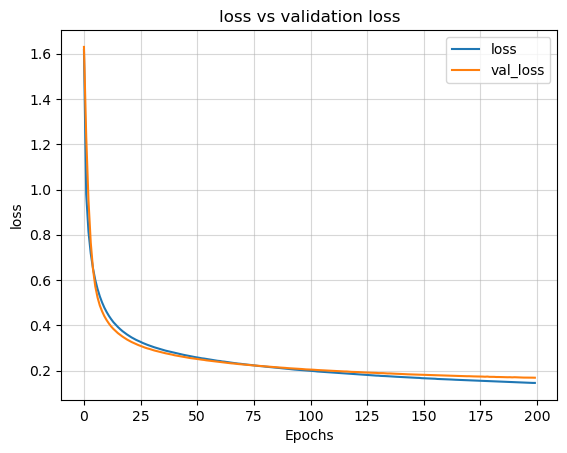

In [45]:
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("loss vs validation loss")
plt.legend(["loss", "val_loss"])
plt.grid(alpha=0.5)
plt.show()

In [46]:
# Loss has reduced significantly
# validation loss curve is beginning to seperate from the loss curve after 150 epochs

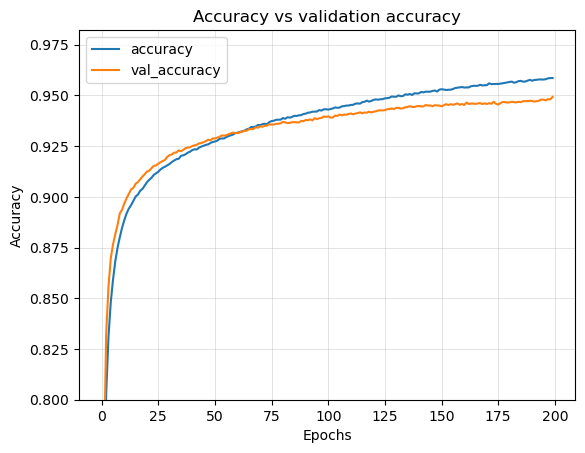

In [52]:
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs validation accuracy")
plt.ylim(0.8)
plt.legend(["accuracy", "val_accuracy"])
plt.grid(alpha=0.5, linewidth=0.5)
plt.show()

In [53]:
# So the accuracy is still increasing as we can observe that both curves are still increasing gradually
# However, we can also observe a slight overfitting as the curves are starting to seperate
# We can increase the numbers of epoch to allow the model to train further and introduce regularization

In [54]:
# Model architecture
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=20, activation="relu", kernel_regularizer=L1L2(l1=0, l2=0.02)))
model.add(BatchNormalization())
model.add(Dense(units=10, activation="softmax"))

# Model Compilation
model.compile(optimizer = SGD(), loss="categorical_crossentropy", metrics=["accuracy"])

# Training the model
model.fit(x=X_train, y=y_train_ohe, epochs=300, validation_data=(X_test, y_test_ohe), batch_size=1000)

Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3785 - loss: 2.7426 - val_accuracy: 0.6172 - val_loss: 2.3149
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7584 - loss: 1.6741 - val_accuracy: 0.7728 - val_loss: 1.8850
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8187 - loss: 1.4592 - val_accuracy: 0.8319 - val_loss: 1.5829
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8437 - loss: 1.3288 - val_accuracy: 0.8583 - val_loss: 1.3773
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8580 - loss: 1.2390 - val_accuracy: 0.8721 - val_loss: 1.2393
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8687 - loss: 1.1618 - val_accuracy: 0.8793 - val_loss: 1.1407
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8740 - loss: 1.1012 - val_accuracy: 0.8837 - val_loss: 1.0690
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8788 - loss: 1.0518 - val_accuracy: 0.8891 -

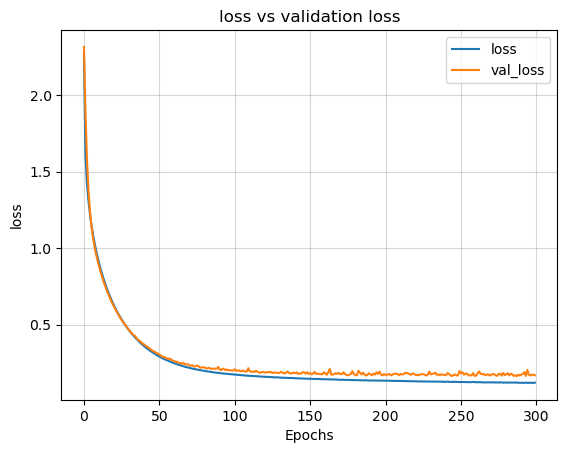

In [55]:
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("loss vs validation loss")
plt.legend(["loss", "val_loss"])
plt.grid(alpha=0.5)
plt.show()

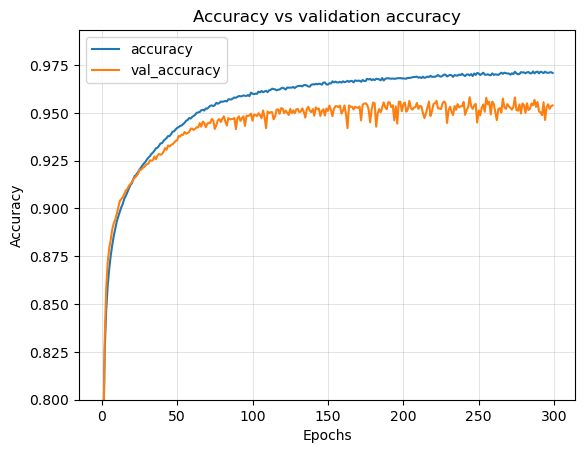

In [56]:
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs validation accuracy")
plt.ylim(0.8)
plt.legend(["accuracy", "val_accuracy"])
plt.grid(alpha=0.5, linewidth=0.5)
plt.show()

In [104]:

# Validation accuracy is showing high unstability inspite of introducing regularization
# Let us introduce one more Dense layer and observe the model's performance

In [67]:
# Model architecture
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=20, activation="relu", kernel_regularizer=L1L2(l1=0, l2=0.04)))
model.add(BatchNormalization())
model.add(Dense(units=20, activation="relu", kernel_regularizer=L1L2(l1=0, l2=0.04)))
model.add(Dense(units=10, activation="softmax"))

# Model Compilation
model.compile(optimizer = SGD(), loss="categorical_crossentropy", metrics=["accuracy"])

# Training the model
model.fit(x=X_train, y=y_train_ohe, epochs=300, validation_data=(X_test, y_test_ohe), batch_size=1000)

Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.2385 - loss: 4.5334 - val_accuracy: 0.4825 - val_loss: 4.1970
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5405 - loss: 3.7030 - val_accuracy: 0.6389 - val_loss: 3.7506
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6533 - loss: 3.2806 - val_accuracy: 0.7226 - val_loss: 3.3258
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7294 - loss: 2.9450 - val_accuracy: 0.7768 - val_loss: 2.9492
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7753 - loss: 2.6841 - val_accuracy: 0.8135 - val_loss: 2.6363
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8127 - loss: 2.4463 - val_accuracy: 0.8393 - val_loss: 2.3807
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8336 - loss: 2.2562 - val_accuracy: 0.8565 - val_loss: 2.1661
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8500 - loss: 2.0805 - val_accuracy: 0.8665

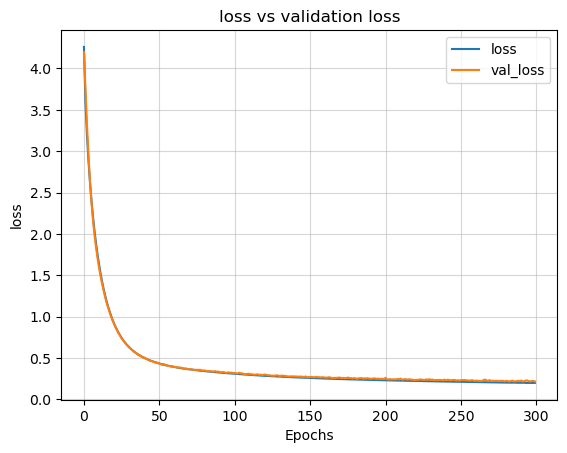

In [69]:
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("loss vs validation loss")
plt.legend(["loss", "val_loss"])
plt.grid(alpha=0.5)
plt.show()

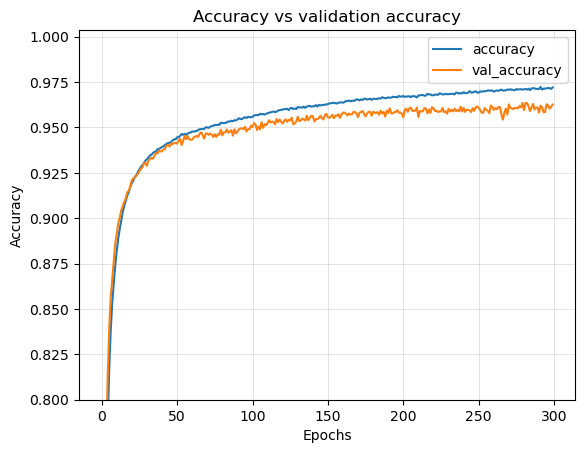

In [70]:
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs validation accuracy")
plt.ylim(0.8)
plt.legend(["accuracy", "val_accuracy"])
plt.grid(alpha=0.5, linewidth=0.5)
plt.show()

In [71]:
# The loss curves have almost flattened out
# Validation accuracy curve has almost flattened and it is showing slight instability

In [72]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,412 (64.11 KB)

 Trainable params: 16,370 (63.95 KB)

 Non-trainable params: 40 (160.00 B)

 Optimizer params: 2 (12.00 B)

## Predictions 

In [73]:
# Generating predictions on the test data
preds = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [74]:
# Extracting the shape of predictions
preds[0].shape

(10,)

In [75]:
# Observing the prediction probabilities for the first observation in test data
preds[0]

array([8.0327661e-04, 1.0106419e-04, 1.2499959e-03, 9.3458814e-04,
       2.5515302e-04, 1.6357303e-04, 3.2141304e-04, 9.9462634e-01,
       6.2337797e-04, 9.2127355e-04], dtype=float32)

In [76]:
# We have to select the index with the highest probability

np.argmax(preds[0])

7

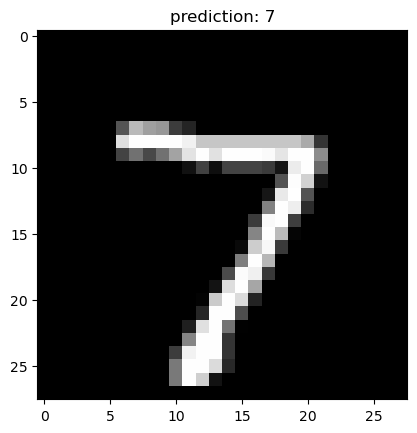

In [81]:
# Plotting the actual image and comparing with the predicted digit
plt.imshow(X_test.reshape(-1, 28, 28)[0], cmap="grey")
plt.title(f"prediction: {np.argmax(preds[0])}")
plt.show()

In [ ]:
# Extracting the index of highest probability for each prediction on the test data
preds_idx = np.argmax(preds, axis=1) 

In [84]:
preds_idx

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [86]:
# Creating a dataframe of the predicted and actual values

import pandas as pd
preds_df = pd.DataFrame({"actual_digits": y_test, "predicted_digits": preds_idx})
preds_df

,actual_digits,predicted_digits
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [116]:
# Extracting the highest probabilities from each prediction
preds_prob = np.max(preds, axis=1)

In [117]:
preds_prob

array([0.99462634, 0.99632   , 0.96478325, ..., 0.983854  , 0.9913611 ,
       0.9978696 ], dtype=float32)

In [123]:
print(preds_prob.shape) #shape of predicted probabilities


(10000,)


In [125]:
print(f"Minimum highest probability: {preds_prob.min()}")
print(f"Maximum highest probability: {preds_prob.max()}")

Minimum highest probability: 0.19802077114582062
Maximum highest probability: 0.9999496936798096


In [120]:
# Adding the probability column to our data frame
preds_df["predict_prob"] = preds_prob
preds_df

,actual_digits,predicted_digits,predict_prob
0,7,7,0.994626
1,2,2,0.996320
2,1,1,0.964783
3,0,0,0.995397
4,4,4,0.916140
...,...,...,...
9995,2,2,0.998998
9996,3,3,0.995202
9997,4,4,0.983854
9998,5,5,0.991361


In [126]:
# Number of predictions predicted with probability less than 60%
len(preds_df[preds_df["predict_prob"]<0.6])

420

## Evaluation

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
# Generating confusion matrix
cm = confusion_matrix(preds_df["actual_digits"], preds_df["predicted_digits"])
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 969    0    0    1    0    1    4    2    3    0]
 [   0 1114    4    2    0    2    3    2    8    0]
 [   4    6  990    9    1    1    4   10    6    1]
 [   0    0    9  980    0    6    0    6    6    3]
 [   1    0    8    0  941    0    8    2    2   20]
 [   3    2    0   25    2  836    9    2   11    2]
 [   8    3    0    1    5    4  932    1    4    0]
 [   2    5   15    6    1    0    0  986    1   12]
 [   7    4    4    7    5    4    9    5  923    6]
 [   5    6    0   16   12    9    0    5    1  955]]


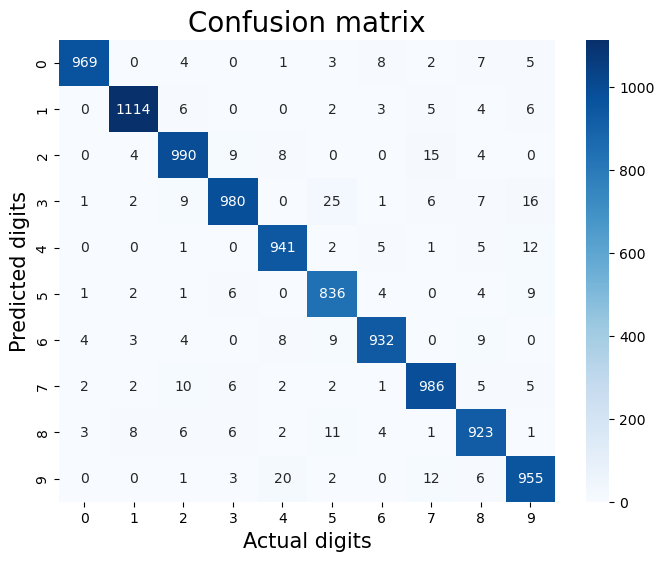

In [128]:
# Plotting confusion matrix for better interpretation
plt.figure(figsize=(8,6))
sns.heatmap(cm.T, cmap="Blues", annot=True, fmt="d")
plt.xlabel("Actual digits", fontsize=15)
plt.ylabel("Predicted digits", fontsize=15)
plt.title("Confusion matrix", fontsize=20)
plt.show()

In [101]:
# Generating Classification Report
clf = classification_report(preds_df["actual_digits"], preds_df["predicted_digits"])
print("Classification Report")
print(clf)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.94      0.95       892
           6       0.96      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [105]:
# The model is performing excellently on all the parameters-accuracy, precision, recall and f1-score across all the classes